In [2]:
import pandas as pd
import os

DATA_PATH = os.path.join(os.pardir, "dataset", "chap03", "sales data.csv")
data = pd.read_csv(DATA_PATH)
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [3]:
cat_cols = ["Channel", "Region"]
cont_cols = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paer", "Delicassen"]

for cat_col in cat_cols:
    dummies = pd.get_dummies(data[cat_col], prefix=cat_col)
    data = pd.concat([data, dummies], axis=1)
    data.drop(cat_col, axis=1, inplace=True)
data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,1,0,0,0,1
436,39228,1431,764,4510,93,2346,1,0,0,0,1
437,14531,15488,30243,437,14841,1867,0,1,0,0,1
438,10290,1981,2232,1038,168,2125,1,0,0,0,1


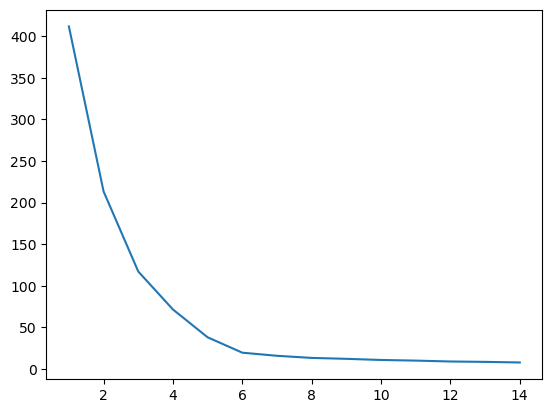

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt


sum_of_squared_distances = []
k_candidates = range(1, 15)
for k_candidate in k_candidates:
    model = Pipeline([("scaler", MinMaxScaler()), ("k_means", KMeans(n_clusters=k_candidate))])
    model.fit_transform(data)
    sum_of_squared_distances.append(model["k_means"].inertia_)
plt.plot(k_candidates, sum_of_squared_distances)